In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from math import log, sqrt


In [58]:
data = pd.read_csv(r"C:\Users\HOME\Downloads\Spam-or-Ham-master\Spam-or-Ham-master\spam.csv",encoding = 'latin-1')

In [59]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [60]:
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
data.rename(columns = {'v1': 'labels', 'v2': 'message'}, inplace = True)
data.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


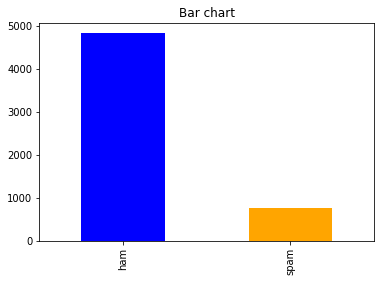

In [64]:
data["labels"].value_counts().plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

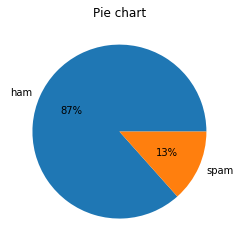

In [63]:
data["labels"].value_counts().plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [65]:
data['label'] = data['labels'].map({'ham': 0, 'spam': 1})
data.drop(['labels'], axis = 1, inplace = True)
data.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [66]:
data['length'] = data['message'].apply(len)
data.head()

,message,label,length
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


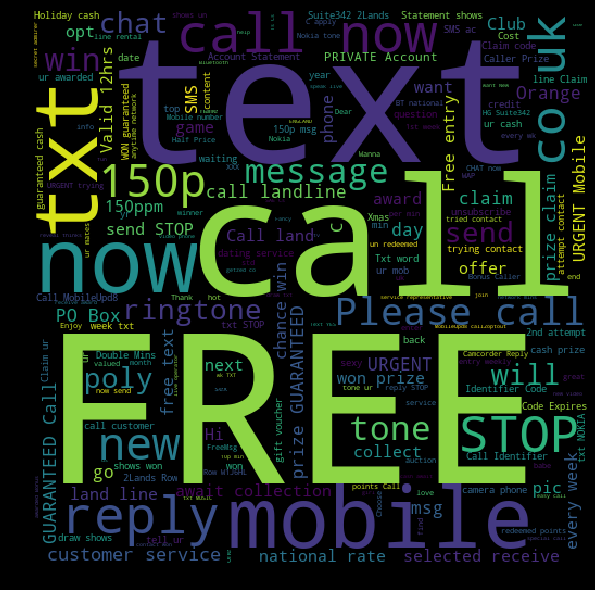

In [67]:
spam_words = ' '.join(list(data[data['label'] == 1]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

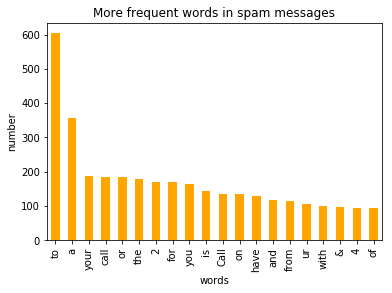

In [68]:
from collections import Counter
count2 = Counter(" ".join(data[data['label']==1]["message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()




In [69]:
X_text = data['message']
y = data['label']

print(X_text.shape)
print(y.shape)


(5572,)
(5572,)


In [70]:
X_text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
5       FreeMsg Hey there darling it's been 3 week's n...
6       Even my brother is not like to speak with me. ...
7       As per your request 'Melle Melle (Oru Minnamin...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
10      I'm gonna be home soon and i don't want to tal...
11      SIX chances to win CASH! From 100 to 20,000 po...
12      URGENT! You have won a 1 week FREE membership ...
13      I've been searching for the right words to tha...
14                    I HAVE A DATE ON SUNDAY WITH WILL!!
15      XXXMobileMovieClub: To use your credit, click ...
16                             Oh k...i'm watching here:)
17      Eh u r

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
sw = stopwords.words("english")
cv = CountVectorizer(stop_words =sw)
tcv = cv.fit_transform(X_text)

X_text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
5       FreeMsg Hey there darling it's been 3 week's n...
6       Even my brother is not like to speak with me. ...
7       As per your request 'Melle Melle (Oru Minnamin...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
10      I'm gonna be home soon and i don't want to tal...
11      SIX chances to win CASH! From 100 to 20,000 po...
12      URGENT! You have won a 1 week FREE membership ...
13      I've been searching for the right words to tha...
14                    I HAVE A DATE ON SUNDAY WITH WILL!!
15      XXXMobileMovieClub: To use your credit, click ...
16                             Oh k...i'm watching here:)
17      Eh u r

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=sw,lowercase=True)
X = vectorizer.fit_transform(X_text).toarray()
print(X.shape)
print(y.shape)


(5572, 8536)
(5572,)


In [73]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.202, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4446, 8536)
(4446,)
(1126, 8536)
(1126,)


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test,pred)


C:\Users\HOME\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9440497335701599

In [75]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test,pred)


0.8854351687388987

In [76]:
from sklearn import metrics
m_confusion_test = metrics.confusion_matrix(y_test, pred)
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,859,114
Actual 1,15,138


In [77]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(500,500))
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9804618117229129

In [78]:
# Predict Ham or Spam Detection

# Ham
x_pred = ["Hey how are you"]
clf.predict(cv.transform(x_pred))[0]

# Spam
x_pred = ["free credit card for you only"]
clf.predict(cv.transform(x_pred))[0]

# Ham
x_pred = ["cred!t card f0r you 0nly, great disc0unts. 0ffer on selected st0res"]
clf.predict(cv.transform(x_pred))[0]

# Ham
text = ['I cant pick the phone right now. Pls send a message']
pred = clf.predict(cv.transform(text))
pred[0]

# Spam
text =['Congratulations ur awarded $500 ']
pred = clf.predict(cv.transform(text))
pred[0]

1